In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt




In [2]:
data = pd.read_csv('BITRE_Fatality-Table 1.csv')
data.head()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1220/1511047806.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BITRE_Fatality-Table 1.csv')


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,19,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekday,Night
1,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,9,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Night
2,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,21,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekday,Night
3,20245021,WA,4,2024,Friday,00:31,Single,No,No,No,...,45,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekday,Night
4,20243023,Qld,4,2024,Friday,01:00,Single,No,No,No,...,24,Outer Regional Australia,Cairns,Cairns,Local Road,No,No,17_to_25,Weekday,Night


02:03:57 - cmdstanpy - INFO - Chain [1] start processing
02:03:57 - cmdstanpy - INFO - Chain [1] done processing
02:03:57 - cmdstanpy - INFO - Chain [1] start processing
02:03:57 - cmdstanpy - INFO - Chain [1] done processing
02:03:57 - cmdstanpy - INFO - Chain [1] start processing
02:03:57 - cmdstanpy - INFO - Chain [1] done processing
02:03:57 - cmdstanpy - INFO - Chain [1] start processing
02:03:57 - cmdstanpy - INFO - Chain [1] done processing
02:03:58 - cmdstanpy - INFO - Chain [1] start processing
02:03:58 - cmdstanpy - INFO - Chain [1] done processing


Evaluation Metrics for the Test Period (2023) - State:
ACT-NSW - MAE: 4.53, MSE: 29.45, MAPE: 14.23%
Forecast vs Actual for first three months of 2024 for ACT-NSW:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  30.319815   14.632701   46.796623
421 2024-02-01  31.233708   15.040739   48.474973
422 2024-03-01  26.273788    9.439068   43.230776
        Date  Counts
0 2024-01-01      32
1 2024-02-01      29
2 2024-03-01      26

Forecast for ACT-NSW in 2030:
            ds       yhat  yhat_lower  yhat_upper
493 2030-01-31  16.080499   -0.490542   32.978257
494 2030-02-28  30.180158   13.272564   47.217349
495 2030-03-31  16.651464    0.492088   33.110561
496 2030-04-30  20.986718    4.533252   37.303029
497 2030-05-31  18.221495    1.400753   35.019236
498 2030-06-30  16.674791   -0.030125   33.086829
499 2030-07-31  22.685497    6.946990   38.563894
500 2030-08-31  23.768682    7.026458   39.962677
501 2030-09-30  21.384938    5.381655   38.041421
502 2030-10-31  22.63

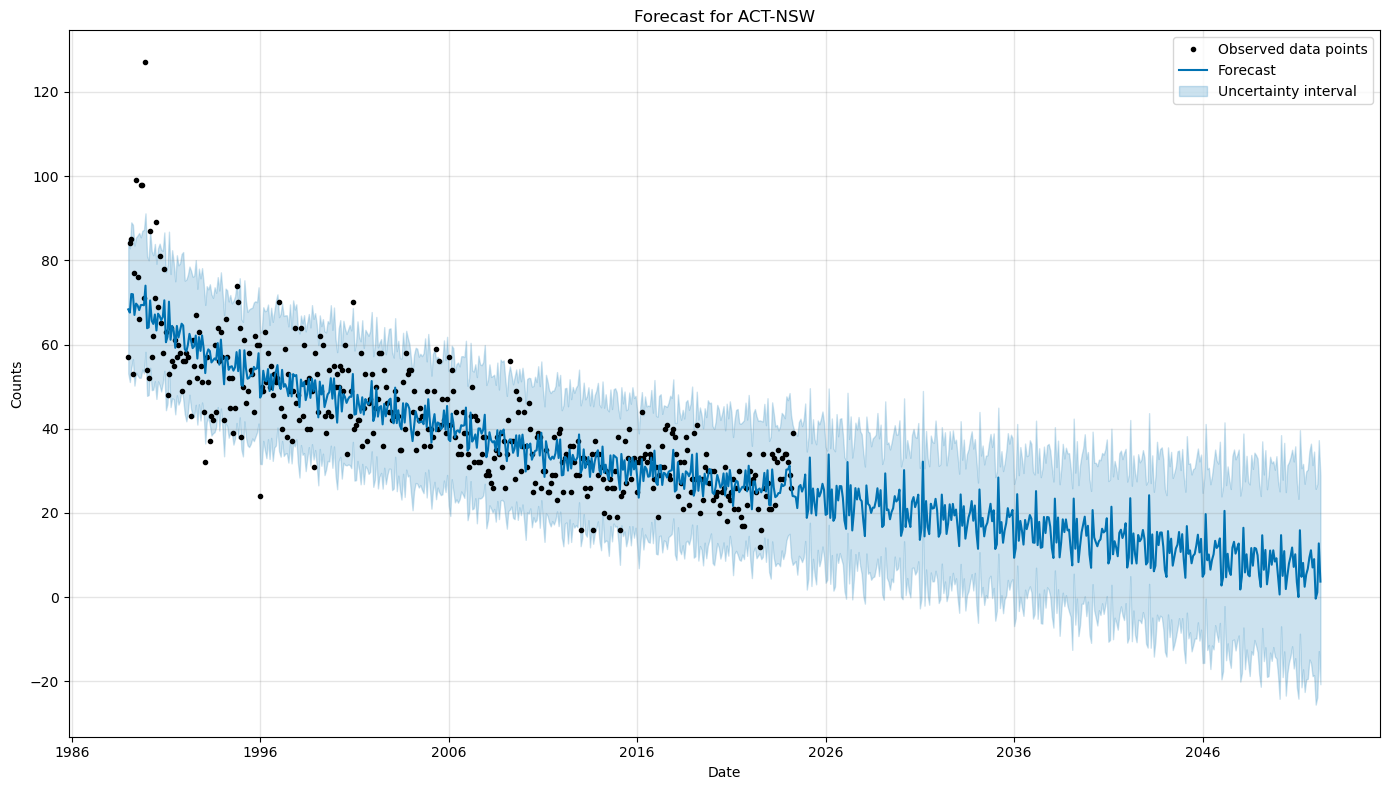

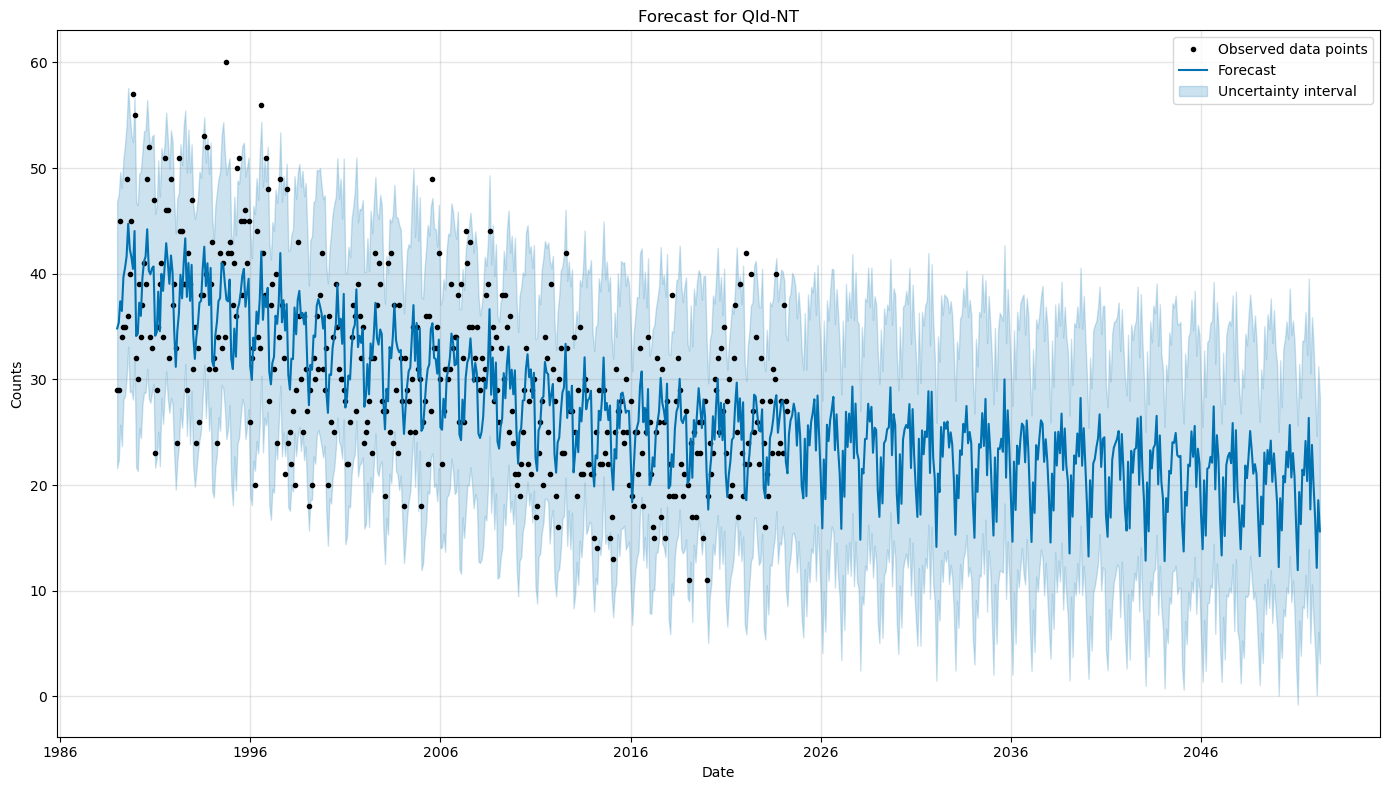

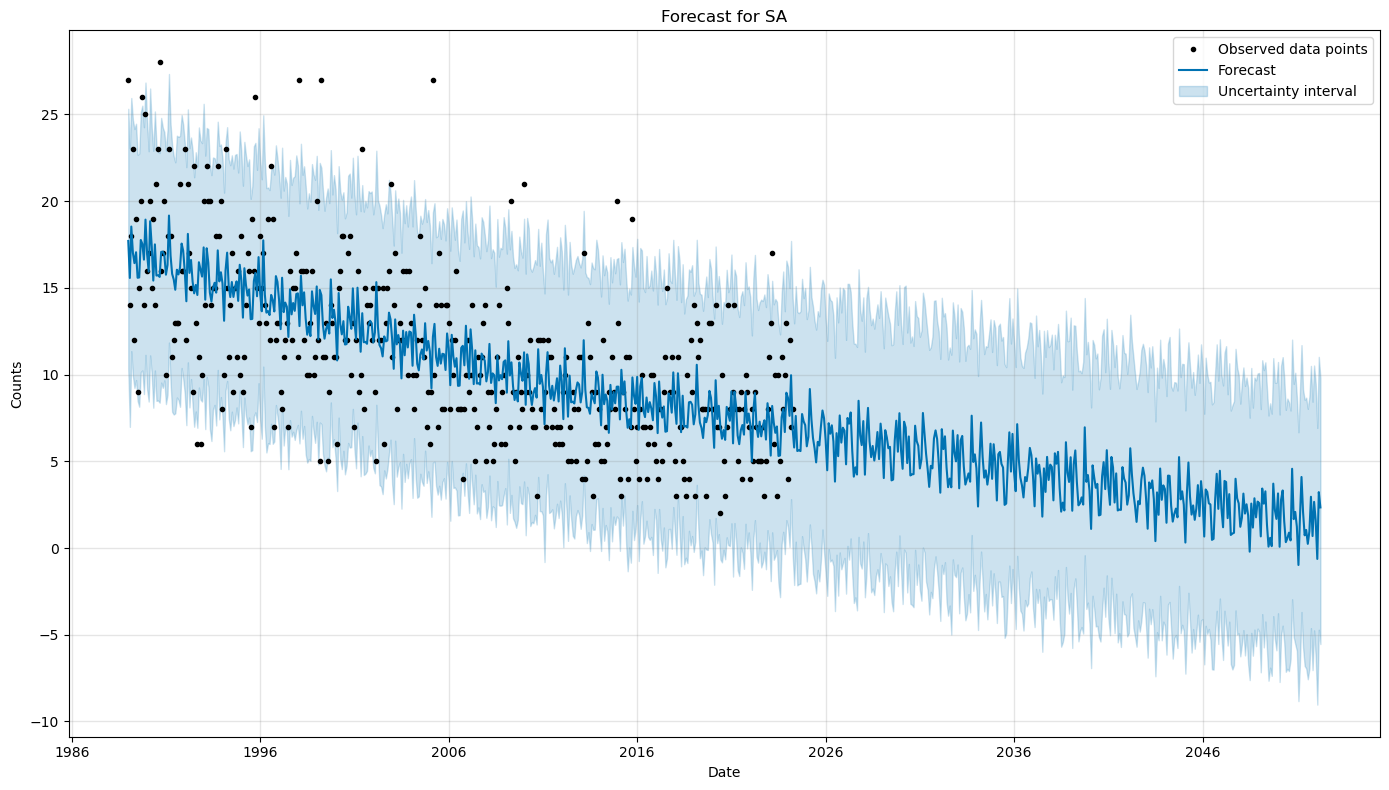

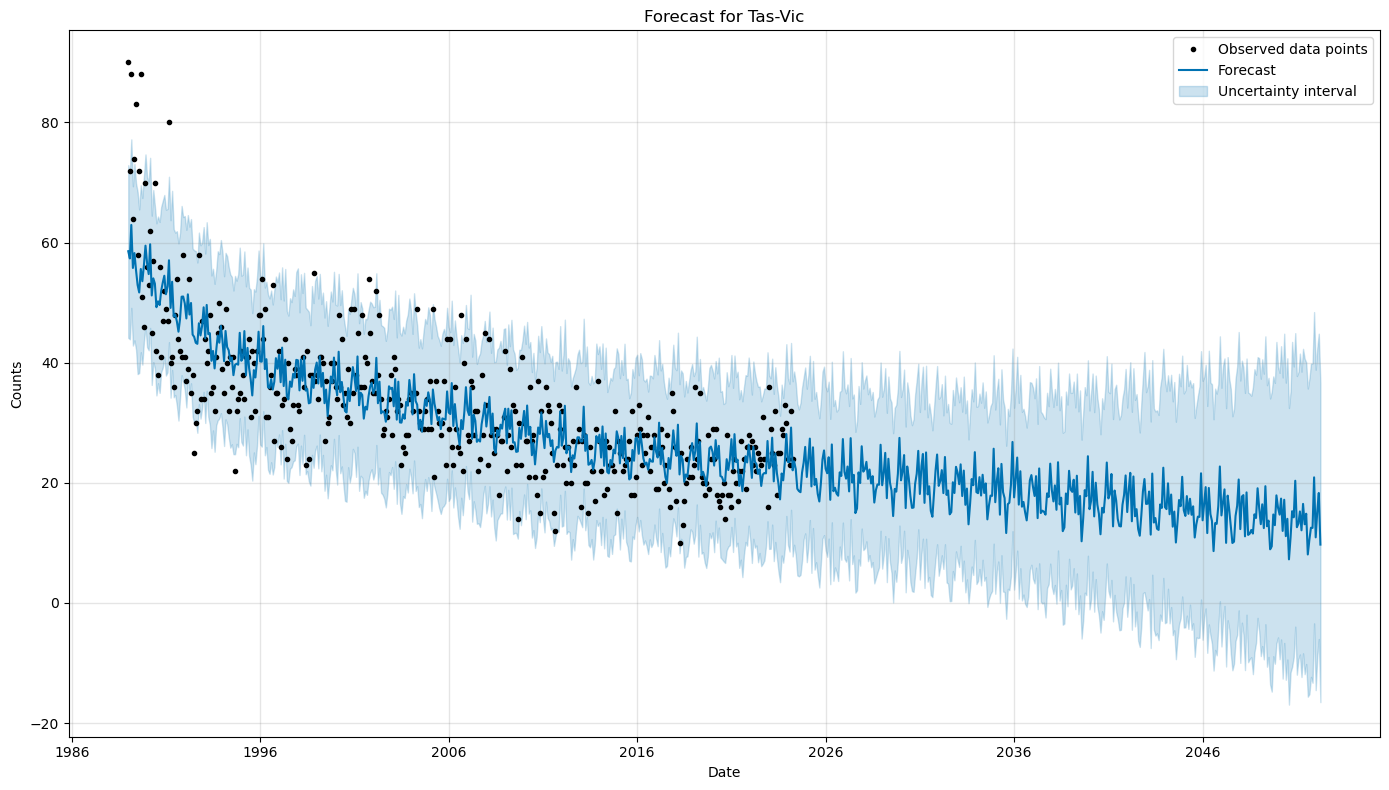

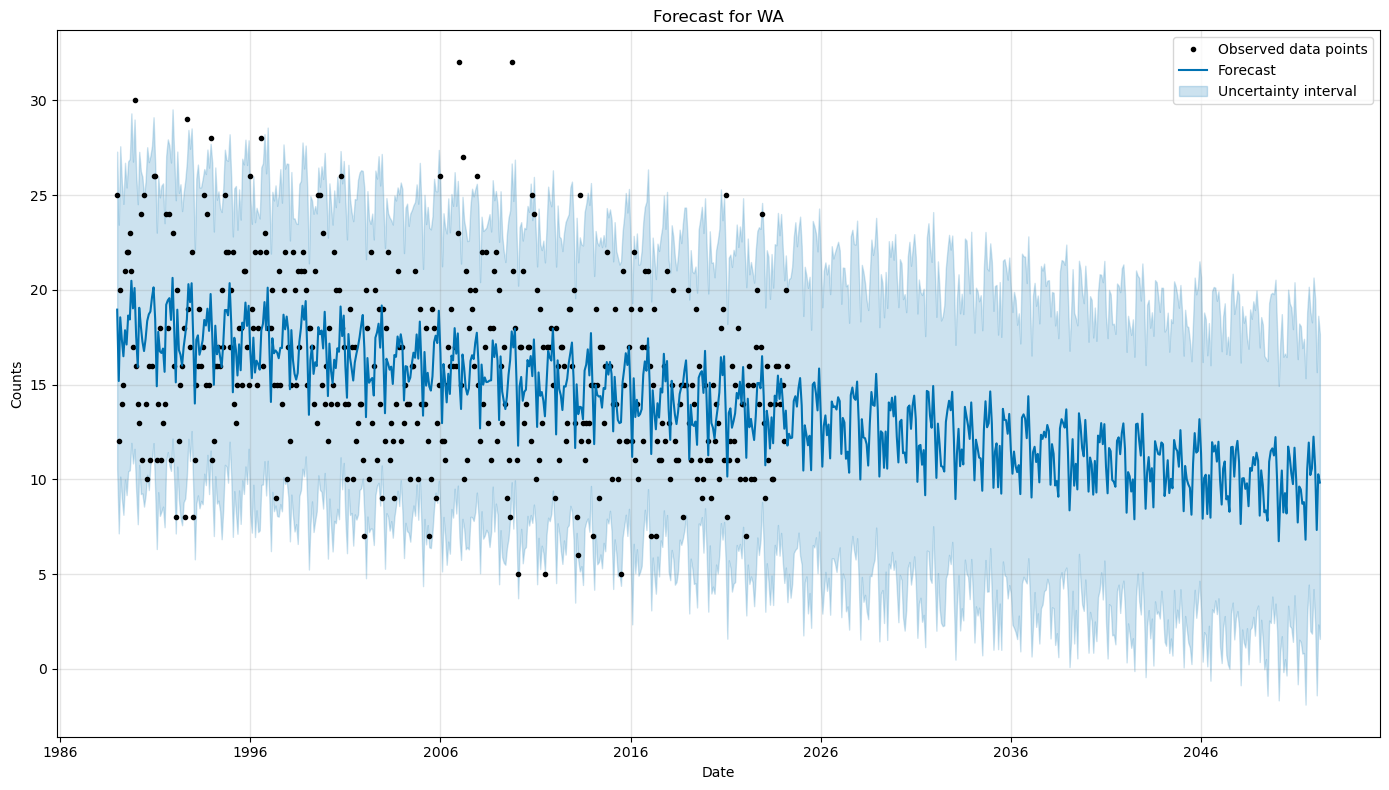

Dickey-Fuller Test Results:

Time of day: ACT-NSW
ADF Statistic: -4.461636711626974
p-value: 0.00023052577979982671
Critical Value 1%: -3.4463221132914486
Critical Value 5%: -2.8685808072418824
Critical Value 10%: -2.570520529031954

Time of day: Qld-NT
ADF Statistic: -2.345594569763295
p-value: 0.15768401000732757
Critical Value 1%: -3.4463221132914486
Critical Value 5%: -2.8685808072418824
Critical Value 10%: -2.570520529031954

Time of day: SA
ADF Statistic: -2.160279160203197
p-value: 0.22097624225282608
Critical Value 1%: -3.4465195891135845
Critical Value 5%: -2.8686676281678634
Critical Value 10%: -2.5705668101226085

Time of day: Tas-Vic
ADF Statistic: -3.45858842616745
p-value: 0.009116546575482961
Critical Value 1%: -3.4465596717208813
Critical Value 5%: -2.8686852499495843
Critical Value 10%: -2.570576203741901

Time of day: WA
ADF Statistic: -3.29453163211745
p-value: 0.015124687227626733
Critical Value 1%: -3.4463612216221775
Critical Value 5%: -2.8685980017932917
Critical

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (abs((y_true - y_pred) / y_true)).mean() * 100


state_map = {'ACT': 'ACT-NSW', 'NSW': 'ACT-NSW', 'Tas': 'Tas-Vic', 'Vic': 'Tas-Vic','Qld':'Qld-NT','NT':'Qld-NT'}

data['State'] = data['State'].map(state_map).fillna(data['State'])

data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Filter data up to 2022 for training and 2023 for testing
train_data = data[data['Year'] <= 2022]

test_data = data[data['Year'] == 2023]
holidays = pd.DataFrame({
    'holiday': 'public_holiday',
    'ds': pd.to_datetime([
        
        
        
        
        '2024-01-01','2024-02-01'
        # Add more holidays as needed
        
        
        
        
    ]),

    'lower_window': 0,
    'upper_window': 1,
})
# Aggregate the number of occurrences of each feature per month for training data
def aggregate_counts(data, feature):
    return data.groupby(['Date', feature]).size().reset_index(name='Counts')

# Prepare the data for Prophet and forecast
def forecast_feature(data, feature):
    counts = aggregate_counts(data, feature)
    
    models = {}
    forecasts = {}
    for value in counts[feature].unique():
        value_data = counts[counts[feature] == value]
        value_data = value_data[['Date', 'Counts']].rename(columns={'Date': 'ds', 'Counts': 'y'})

        # Initialize and fit the Prophet model
        model = Prophet(interval_width=0.95,
                        yearly_seasonality=True,
                        daily_seasonality=True,
                        weekly_seasonality=True,
                        seasonality_mode='additive',holidays=holidays)
        model.fit(value_data)
        models[value] = model

        # Create a dataframe for future dates including 2023 (test period) and beyond
        future_dates = model.make_future_dataframe(periods=(2050 - 2022) * 12, freq='M')

        # Predict future values
        forecast = model.predict(future_dates)
        forecasts[value] = forecast
    
    return models, forecasts

# Forecast for a specific feature
feature = 'State'  # Change this to the desired feature
time_of_day_models, forecasts = forecast_feature(data, feature)

# Calculate and print evaluation metrics for the test period (2023)
print(f"Evaluation Metrics for the Test Period (2023) - {feature}:")
for value, forecast in forecasts.items():
    # Filter forecast for 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]

    # Filter actual counts for 2023
    actual_counts_2023 = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    actual_counts_2023 = actual_counts_2023.rename(columns={'Date': 'ds', 'Counts': 'y'})

    # Ensure the forecast and actual data are aligned
    forecast_2023 = forecast_2023.set_index('ds').loc[actual_counts_2023['ds']].reset_index()

    # Calculate evaluation metrics
    mae = mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mse = mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mape = mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat'])

    print(f"{value} - MAE: {mae:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%")
    print(f"Forecast vs Actual for first three months of 2024 for {value}:")
    future_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(future_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Filter actual counts for first three months of 2024
    actual_counts_2024 = data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2024-03-31') & (data[feature] == value)]
    actual_counts_2024 = actual_counts_2024.groupby('Date').size().reset_index(name='Counts')
    print(actual_counts_2024)
    print()

    # Print forecast for 2030, 2040, and 2050
    future_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    future_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    future_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    
    print(f"Forecast for {value} in 2030:")
    print(future_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2040:")
    print(future_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2050:")
    print(future_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()

# Plot the forecasts in separate figures
for value, forecast in forecasts.items():
    fig, ax = plt.subplots(figsize=(14, 8))
    model = time_of_day_models[value]
    model.plot(forecast, ax=ax, xlabel='Date', ylabel='Counts')
    
    # Plot training data
   
    
    ax.legend()
    ax.set_title(f'Forecast for {value}')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Perform Dickey-Fuller Test
print("Dickey-Fuller Test Results:")
for value, forecast in forecasts.items():
    time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    adf_result = adfuller(time_data['Counts'])
    print(f"\nTime of day: {value}")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    for key, value in adf_result[4].items():
        print(f"Critical Value {key}: {value}")

# Print actual counts for each year from 2013 to 2023
print("\nActual Counts per Year (2013-2023):")
for year in range(2013, 2024):
    year_counts = data[data['Year'] == year].groupby('Year').size().reset_index(name='Counts')
    print(f"Year {year}: {year_counts['Counts'].sum()} counts")


WITHOUT HOLIDAY

02:02:37 - cmdstanpy - INFO - Chain [1] start processing
02:02:38 - cmdstanpy - INFO - Chain [1] done processing
02:02:38 - cmdstanpy - INFO - Chain [1] start processing
02:02:38 - cmdstanpy - INFO - Chain [1] done processing
02:02:38 - cmdstanpy - INFO - Chain [1] start processing
02:02:38 - cmdstanpy - INFO - Chain [1] done processing
02:02:38 - cmdstanpy - INFO - Chain [1] start processing
02:02:38 - cmdstanpy - INFO - Chain [1] done processing
02:02:39 - cmdstanpy - INFO - Chain [1] start processing
02:02:39 - cmdstanpy - INFO - Chain [1] done processing


Evaluation Metrics for the Test Period (2023) - State:
ACT-NSW - MAE: 4.69, MSE: 31.50, MAPE: 14.67%
Forecast vs Actual for first three months of 2024 for ACT-NSW:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  20.296470    4.167162   35.731130
421 2024-02-01  32.008290   16.536378   48.611010
422 2024-03-01  26.369116    9.489209   41.481887
        Date  Counts
0 2024-01-01      32
1 2024-02-01      29
2 2024-03-01      26

Forecast for ACT-NSW in 2030:
            ds       yhat  yhat_lower  yhat_upper
493 2030-01-31  15.045563   -2.229952   30.546579
494 2030-02-28  28.758925   11.030077   45.123531
495 2030-03-31  17.258065    0.918627   32.804084
496 2030-04-30  20.155425    3.702349   36.593091
497 2030-05-31  17.533667    1.268644   33.874731
498 2030-06-30  16.126556   -0.875397   31.949571
499 2030-07-31  22.307639    5.554481   38.077290
500 2030-08-31  23.387247    7.175641   38.015106
501 2030-09-30  20.833439    4.276076   37.375292
502 2030-10-31  21.90

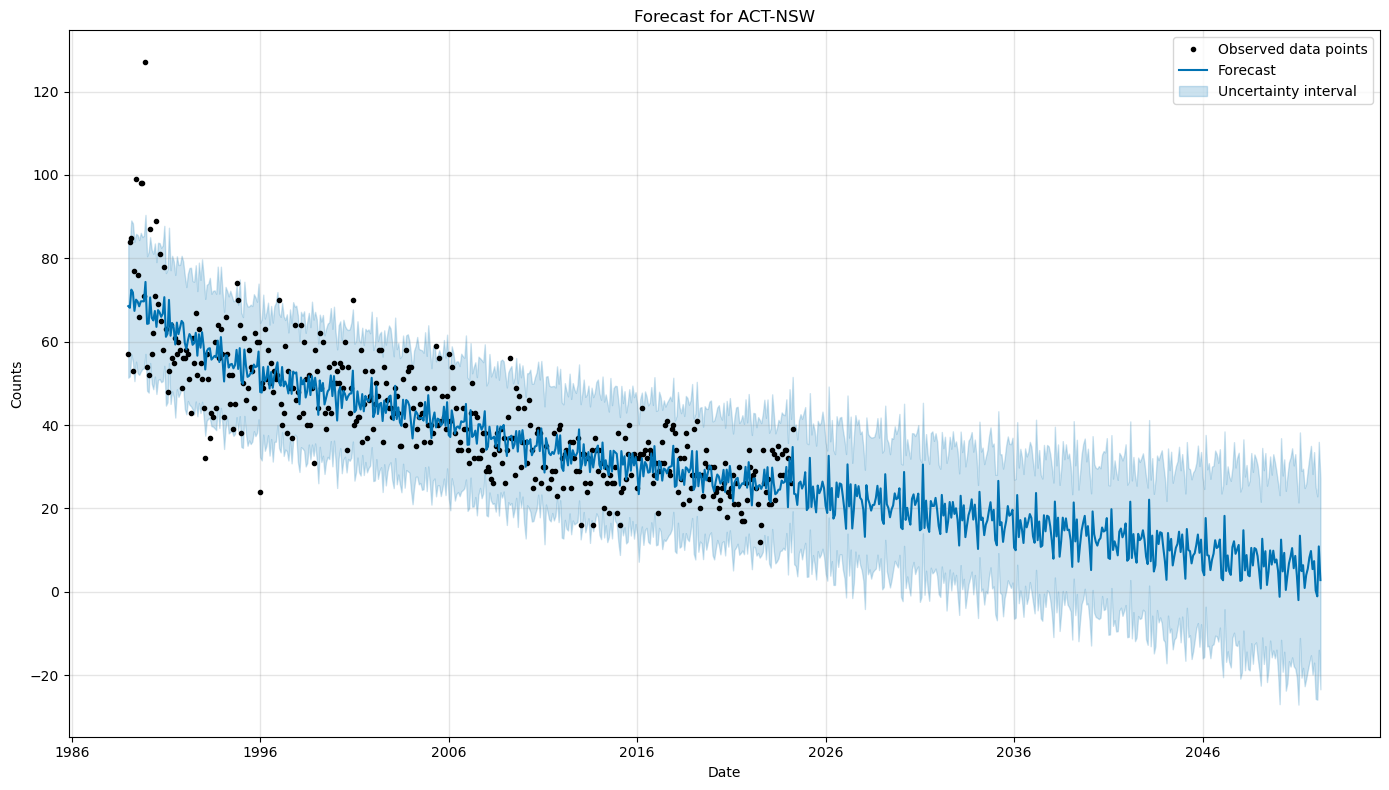

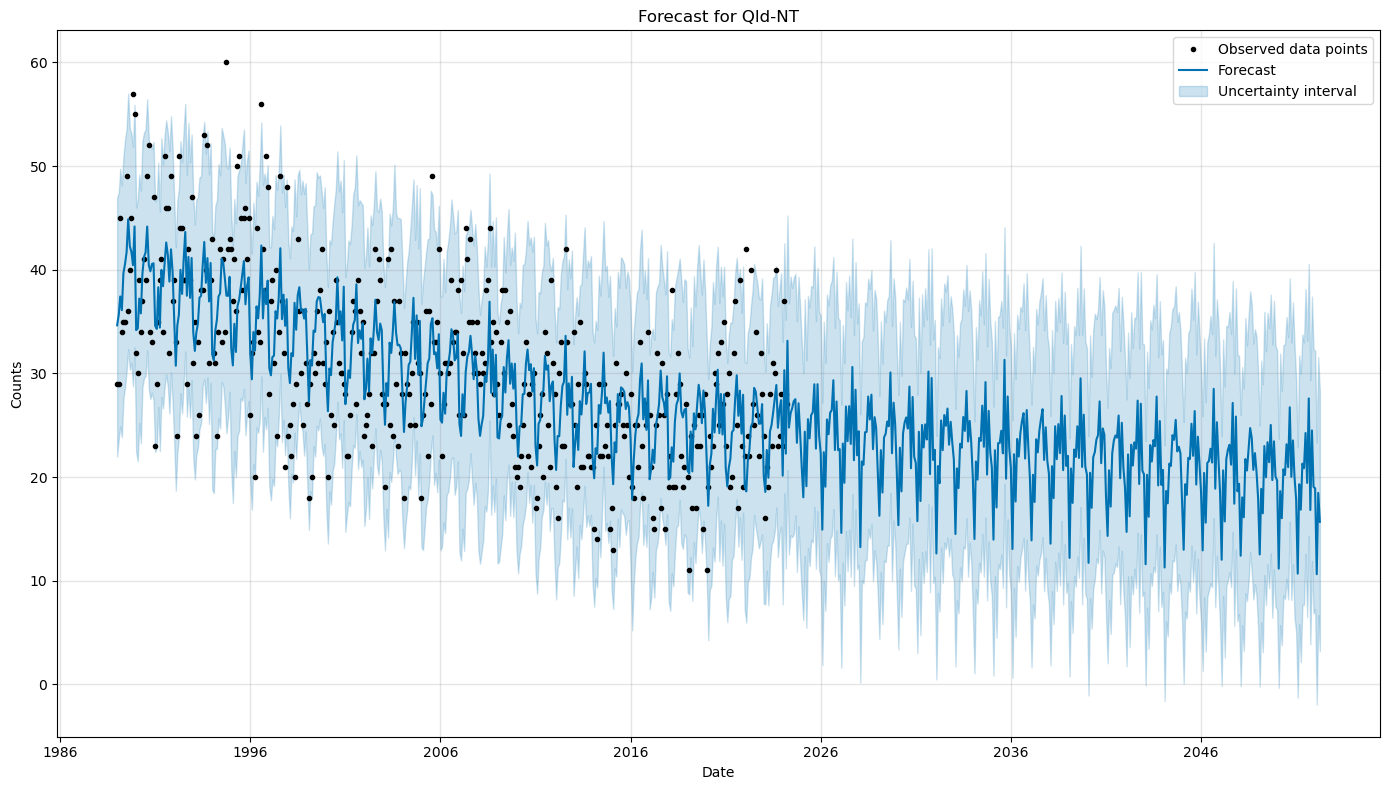

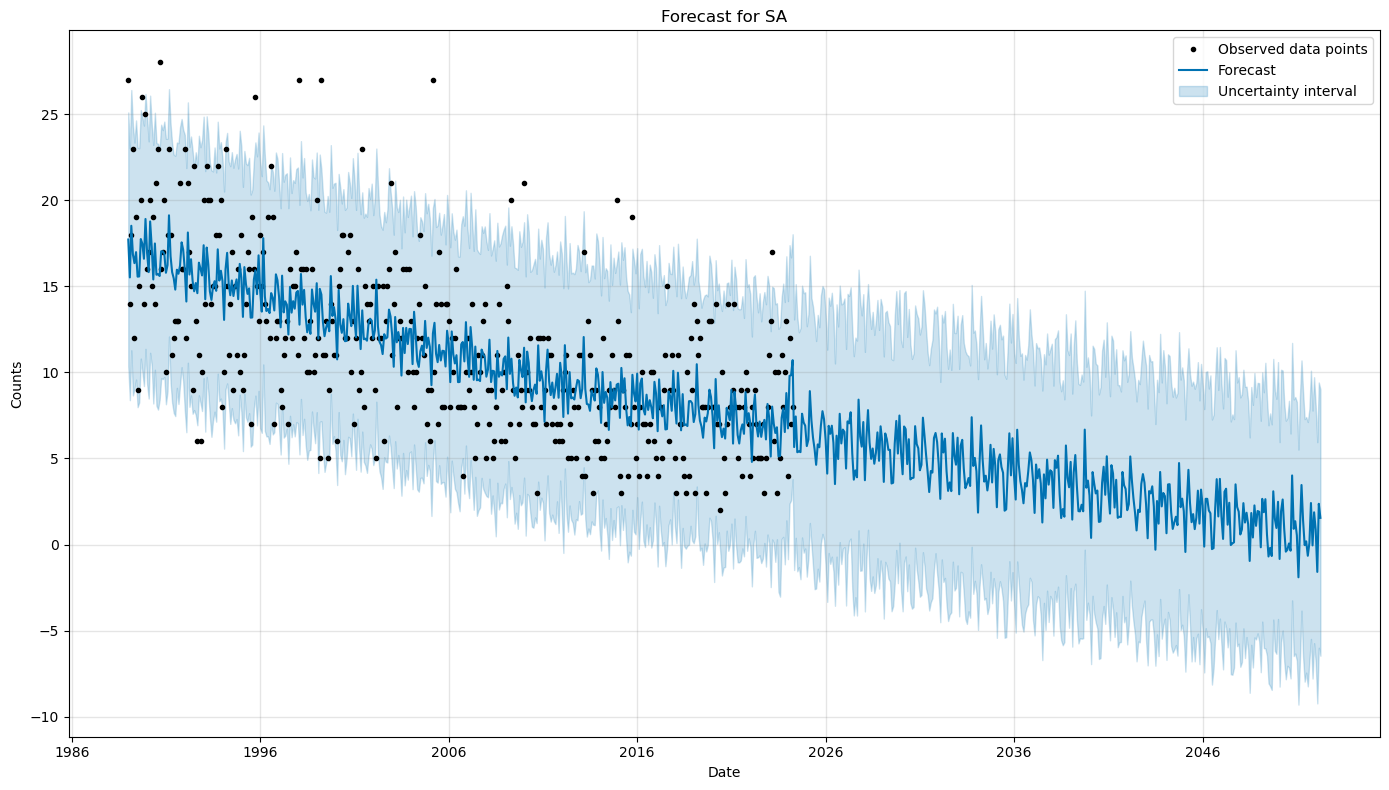

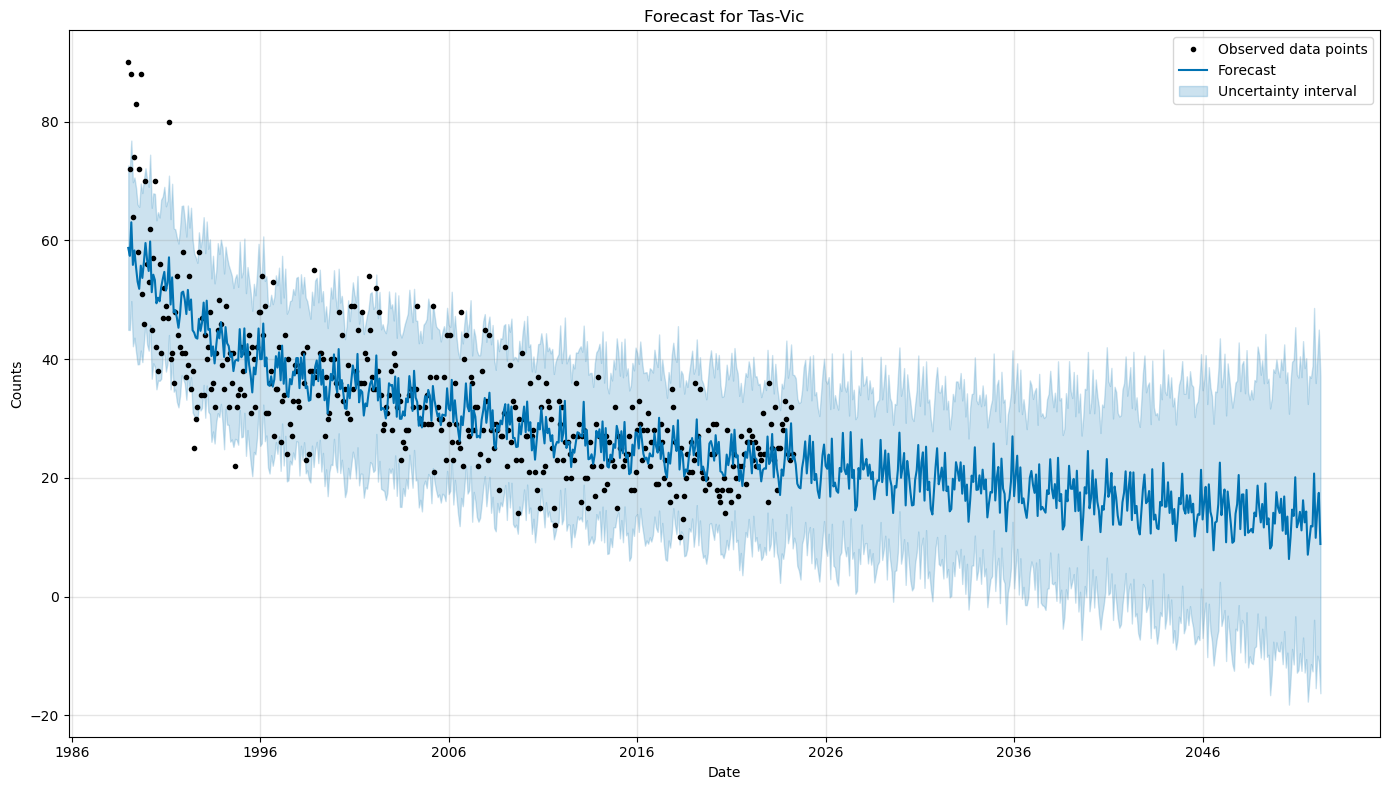

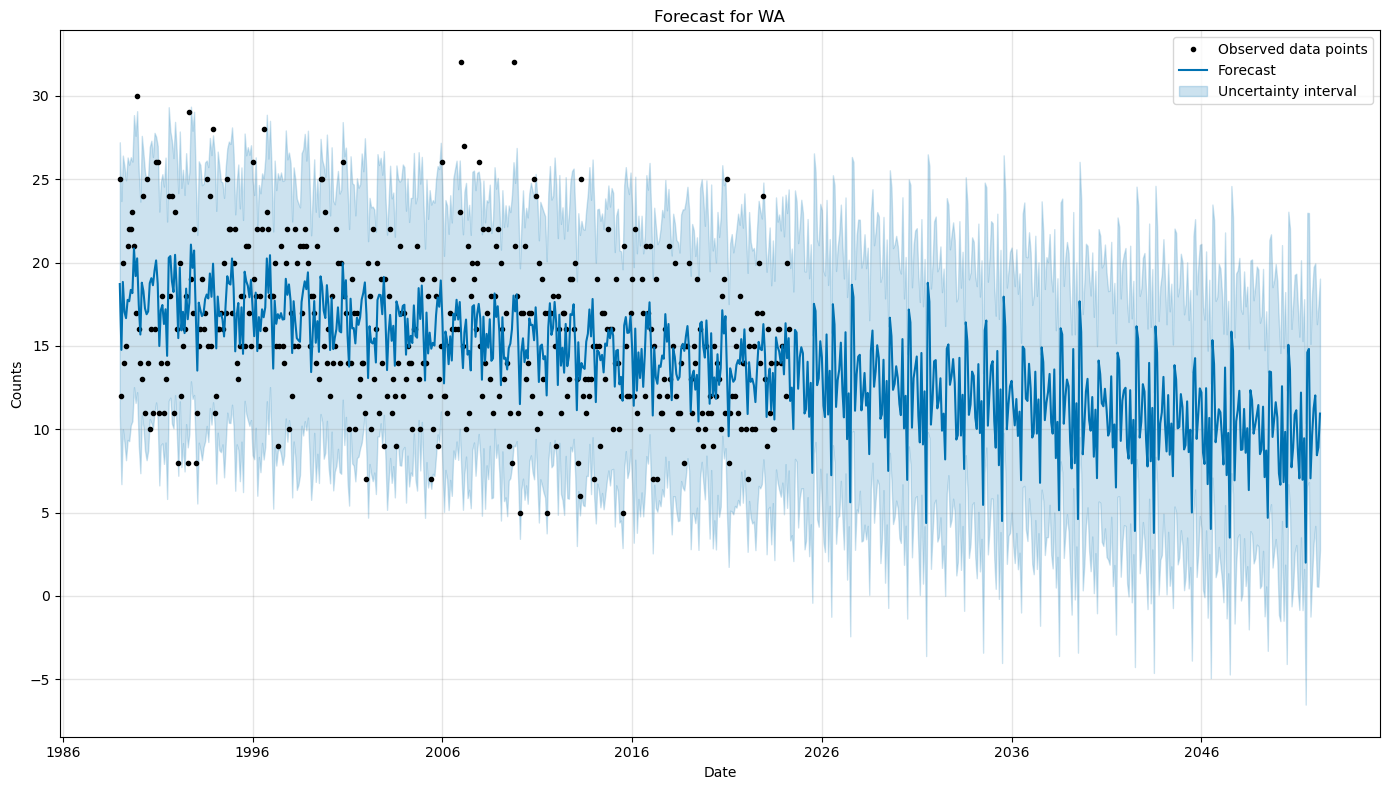

Dickey-Fuller Test Results:

Time of day: ACT-NSW
ADF Statistic: -4.461636711626974
p-value: 0.00023052577979982671
Critical Value 1%: -3.4463221132914486
Critical Value 5%: -2.8685808072418824
Critical Value 10%: -2.570520529031954

Time of day: Qld-NT
ADF Statistic: -2.345594569763295
p-value: 0.15768401000732757
Critical Value 1%: -3.4463221132914486
Critical Value 5%: -2.8685808072418824
Critical Value 10%: -2.570520529031954

Time of day: SA
ADF Statistic: -2.160279160203197
p-value: 0.22097624225282608
Critical Value 1%: -3.4465195891135845
Critical Value 5%: -2.8686676281678634
Critical Value 10%: -2.5705668101226085

Time of day: Tas-Vic
ADF Statistic: -3.45858842616745
p-value: 0.009116546575482961
Critical Value 1%: -3.4465596717208813
Critical Value 5%: -2.8686852499495843
Critical Value 10%: -2.570576203741901

Time of day: WA
ADF Statistic: -3.29453163211745
p-value: 0.015124687227626733
Critical Value 1%: -3.4463612216221775
Critical Value 5%: -2.8685980017932917
Critical

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (abs((y_true - y_pred) / y_true)).mean() * 100

# Load the data

# Merge ACT and NSW into a single state
# Alternative approach using map with a dictionary
state_map = {'ACT': 'ACT-NSW', 'NSW': 'ACT-NSW', 'Tas': 'Tas-Vic', 'Vic': 'Tas-Vic','Qld':'Qld-NT','NT':'Qld-NT'}

data['State'] = data['State'].map(state_map).fillna(data['State'])

# Convert the 'Year' and 'Month' columns to a single datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Filter data up to 2022 for training and 2023 for testing
train_data = data[data['Year'] <= 2022]
test_data = data[data['Year'] == 2023]

# Aggregate the number of occurrences of each feature per month for training data
def aggregate_counts(data, feature):
    return data.groupby(['Date', feature]).size().reset_index(name='Counts')

# Prepare the data for Prophet and forecast
def forecast_feature(data, feature):
    counts = aggregate_counts(data, feature)
    
    models = {}
    forecasts = {}
    for value in counts[feature].unique():
        value_data = counts[counts[feature] == value]
        value_data = value_data[['Date', 'Counts']].rename(columns={'Date': 'ds', 'Counts': 'y'})

        # Initialize and fit the Prophet model
        model = Prophet(interval_width=0.95,
                        yearly_seasonality=True,
                        daily_seasonality=True,
                        weekly_seasonality=True,
                        seasonality_mode='additive',holidays=holidays)
        model.fit(value_data)
        models[value] = model

        # Create a dataframe for future dates including 2023 (test period) and beyond
        future_dates = model.make_future_dataframe(periods=(2050 - 2022) * 12, freq='M')

        # Predict future values
        forecast = model.predict(future_dates)
        forecasts[value] = forecast
    
    return models, forecasts

# Forecast for a specific feature
feature = 'State'  # Change this to the desired feature
time_of_day_models, forecasts = forecast_feature(data, feature)

# Calculate and print evaluation metrics for the test period (2023)
print(f"Evaluation Metrics for the Test Period (2023) - {feature}:")
for value, forecast in forecasts.items():
    # Filter forecast for 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]

    # Filter actual counts for 2023
    actual_counts_2023 = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    actual_counts_2023 = actual_counts_2023.rename(columns={'Date': 'ds', 'Counts': 'y'})

    # Ensure the forecast and actual data are aligned
    forecast_2023 = forecast_2023.set_index('ds').loc[actual_counts_2023['ds']].reset_index()

    # Calculate evaluation metrics
    mae = mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mse = mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mape = mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat'])

    print(f"{value} - MAE: {mae:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%")
    print(f"Forecast vs Actual for first three months of 2024 for {value}:")
    future_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(future_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Filter actual counts for first three months of 2024
    actual_counts_2024 = data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2024-03-31') & (data[feature] == value)]
    actual_counts_2024 = actual_counts_2024.groupby('Date').size().reset_index(name='Counts')
    print(actual_counts_2024)
    print()

    # Print forecast for 2030, 2040, and 2050
    future_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    future_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    future_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    
    print(f"Forecast for {value} in 2030:")
    print(future_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2040:")
    print(future_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2050:")
    print(future_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()

# Plot the forecasts in separate figures
for value, forecast in forecasts.items():
    fig, ax = plt.subplots(figsize=(14, 8))
    model = time_of_day_models[value]
    model.plot(forecast, ax=ax, xlabel='Date', ylabel='Counts')
    
    # Plot training data
   
    
    ax.legend()
    ax.set_title(f'Forecast for {value}')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Perform Dickey-Fuller Test
print("Dickey-Fuller Test Results:")
for value, forecast in forecasts.items():
    time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    adf_result = adfuller(time_data['Counts'])
    print(f"\nTime of day: {value}")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    for key, value in adf_result[4].items():
        print(f"Critical Value {key}: {value}")

# Print actual counts for each year from 2013 to 2023
print("\nActual Counts per Year (2013-2023):")
for year in range(2013, 2024):
    year_counts = data[data['Year'] == year].groupby('Year').size().reset_index(name='Counts')
    print(f"Year {year}: {year_counts['Counts'].sum()} counts")
